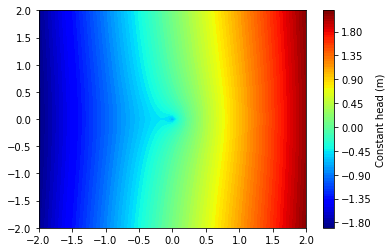

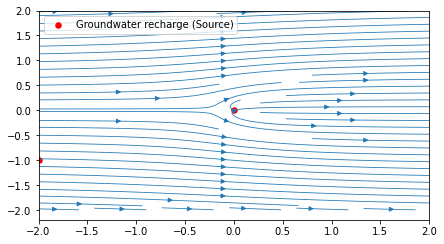

In [6]:
import math
import numpy as np 
import matplotlib.pyplot as plt 

#embed into notebook 
#%config InlineBackend.figure_format = 'svg'

#define a uniform stream
def uniform(x, y, U = 1, α = 0):
	u = U*np.cos(α)
	v = U*np.sin(α)
	Φ = U*(x*np.cos(α) + y*np.sin(α))
	return u, v, Φ

#define source/ sink
def source(x, y, m = 1, x0 = 0.0, y0 = 0.0):
	r = np.sqrt((x-x0)**2 + (y-y0)**2)
	θ = np.arctan2((y-y0), (x-x0))
	ur = m/2.0/np.pi/r
	ux = ur*np.cos(θ)
	uy = ur*np.sin(θ)
	Φ = m/2.0/np.pi*np.log(r)
	return ux, uy, Φ

#SOURCE IN UNIFORM STREAM
#We will add a uniform stram and a source located at the origin. But first, we need to define a grid for the x, y coordinates in the plane

N = 150
x0 = -2.0
x1 = 2.0
y0 = -2.0
y1 = 2.0
x = np.linspace(x0, x1, N)
y = np.linspace(y0, y1, N)
X, Y = np.meshgrid(x,y)


#start to compute the free stream
U = 1.0 # m/s
u0, v0, Φ0 = uniform(X, Y, U)

#now add the source
m = 1.0 #source strength
u1, v1, Φ1 = source(X,Y,m)


#total velocity
u = u0 + u1
v = v0 + v1
Φ = Φ0 + Φ1

#print(u)
#print(v)
#contour of streamfunction
colorinterpolation = 100
colourMap = plt.cm.jet
#plt.contourf(X,Y,Φ1, colorinterpolation, cmap=colourMap)
plt.contourf(X,Y,Φ, colorinterpolation, cmap=colourMap)

plt.colorbar(label='Constant head (m)')
#make plots
plt.figure(figsize=(7,3.85))
plt.streamplot(X,Y,u,v, density = 1, linewidth = 0.8)
#plot source location
plt.scatter(0,0,color = 'red', s=30, marker='o', label = 'Groundwater recharge (Source)' )
plt.scatter(-2,-1, color = 'red', s=30, marker='o')
plt.legend(loc='upper left')

#plt.title('Simplest default with labels')
plt.show()







# SOURCE + SINK IN UNIFORM STREAM


In [3]:
#start to compute the free stream
U = 1.0 # m/s
u0, v0, Φ0 = uniform(X, Y, U)


#a = 1.5
m = 1.0 #source strength
#now add the source at -a
u1, v1, Φ1 = source(X,Y,m, x0 = 1)
#now add the sink at a
u2, v2, Φ2 = source(X,Y,-m, x0 = 0)

#total velocity
u = u0 + u1 + u2
v = v0 + v1 + v2
Φ = Φ0 + Φ1 + Φ2

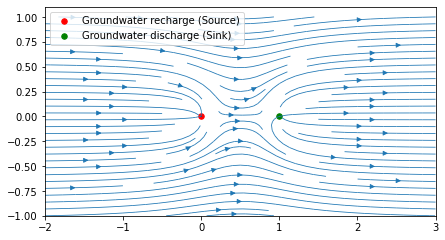

In [4]:
#make plots
plt.figure(figsize=(7,3.85))
plt.streamplot(X,Y,u,v, density = 1, linewidth = 0.8)

#plot source location
plt.scatter(0,0,color = 'red', s=30, marker='o', label = 'Groundwater recharge (Source)' )
#plot sink location
plt.scatter(1,0,color = 'green', s=30, marker='o', label = 'Groundwater discharge (Sink)' )
plt.legend(loc='upper left')


#plot source location
#plt.scatter(-a,0,color = 'red', s=30, marker='o', label = 'Groundwater recharge (Sink)' )
#plot sink location
#plt.scatter(a,0,color = 'green', s=30, marker='o', label = 'Groundwater discharge (Source)' )
#plt.legend(loc='upper left')


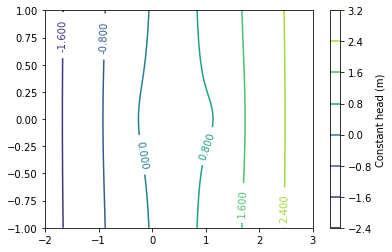

In [5]:
#plt.contour(X,Y,Φ)
CS = plt.contour(X, Y, Φ,)
plt.clabel(CS, inline=0.1, fontsize=10 )

#plt.contourf(X,Y,Φ, colorinterpolation, cmap=colourMap)
plt.colorbar(label='Constant head (m)')